Problem Definition
Objective: The goal is to develop a predictive model that assesses the creditworthiness of customers based on their financial and personal information.

Type of Learning Problem: This is a supervised classification problem. The task is to predict a binary target variable (creditworthiness) indicating whether a customer is creditworthy (1 for yes) or not (2 for no).

Target Variable: Creditworthy

1 indicates the customer is creditworthy.
2 indicates the customer is not creditworthy.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV

In [3]:

# Load the data without headers
data = pd.read_csv('kredit.dat', header=None, delim_whitespace=True)

# Assigning column names
data.columns = [
    "Status_of_checking_account", "Duration_in_month", "Credit_history", "Purpose",
    "Credit_amount", "Savings_account_bonds", "Present_employment_since",
    "Installment_rate", "Personal_status_sex", "Other_debtors_guarantors",
    "Present_residence_since", "Property", "Age_in_years", "Other_installment_plans",
    "Housing", "Number_of_existing_credits", "Job", "Number_of_liable_people",
    "Telephone", "Foreign_worker", "Creditworthy"
]

# View the first few rows of the dataframe
print(data.tail(10))


    Status_of_checking_account  Duration_in_month Credit_history Purpose  \
990                        A14                 12            A32     A43   
991                        A14                 48            A34     A41   
992                        A14                  6            A31       ?   
993                        A14                 18            A32     A43   
994                        A12                 30            A32     A42   
995                        A14                 21            A32     A49   
996                        A11                  6            A31     A46   
997                        A12                 12            A32     A40   
998                        A11                 24            A32     A40   
999                        A12                 12            A32     A40   

     Credit_amount Savings_account_bonds Present_employment_since  \
990            707                   A61                        ?   
991           2751       

/var/folders/sl/l8b5xtqs101318y97f32zq9w0000gn/T/ipykernel_11115/1335106144.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('kredit.dat', header=None, delim_whitespace=True)


Handling Missing Values:
Rationale: Missing data can lead to biases and inaccuracies in the model. It is important to decide on an imputation strategy that preserves the integrity of the dataset.
Strategy:
For numerical features, impute missing values using the median to minimize the impact of outliers.
For categorical features, impute missing values using the mode since it represents the most common category.

In [ ]:

# Convert categorical data to numerical
#data = pd.get_dummies(data, drop_first=True)
# Convert boolean columns to integer type
#for col in data.select_dtypes(include='bool').columns:
#   data[col] = data[col].astype(int)

In [8]:
data.replace('?', np.nan, inplace=True)

print("Checking for missing values:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Checking for missing values:
Purpose                     173
Present_employment_since    496
Job                         232
Foreign_worker              360
dtype: int64


In [10]:
# Fill numerical missing values with the median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())

# Fill categorical missing values with the mode
for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])



In [12]:
#Summary Statistics
print("\nSummary statistics for numerical features:")
print(data.describe())

print("\nSummary statistics for categorical features:")
print(data.describe(include=['object', 'category']))

print("\nFrequency counts for categorical features:")
for col in data.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())



Summary statistics for numerical features:
       Duration_in_month  Credit_amount  Installment_rate  \
count        1000.000000    1000.000000       1000.000000   
mean           20.903000    3271.258000          2.973000   
std            12.058814    2822.736876          1.118715   
min             4.000000     250.000000          1.000000   
25%            12.000000    1365.500000          2.000000   
50%            18.000000    2319.500000          3.000000   
75%            24.000000    3972.250000          4.000000   
max            72.000000   18424.000000          4.000000   

       Present_residence_since  Age_in_years  Number_of_existing_credits  \
count              1000.000000   1000.000000                 1000.000000   
mean                  2.845000     35.546000                    1.407000   
std                   1.103718     11.375469                    0.577654   
min                   1.000000     19.000000                    1.000000   
25%                   2.00

#Visualizations

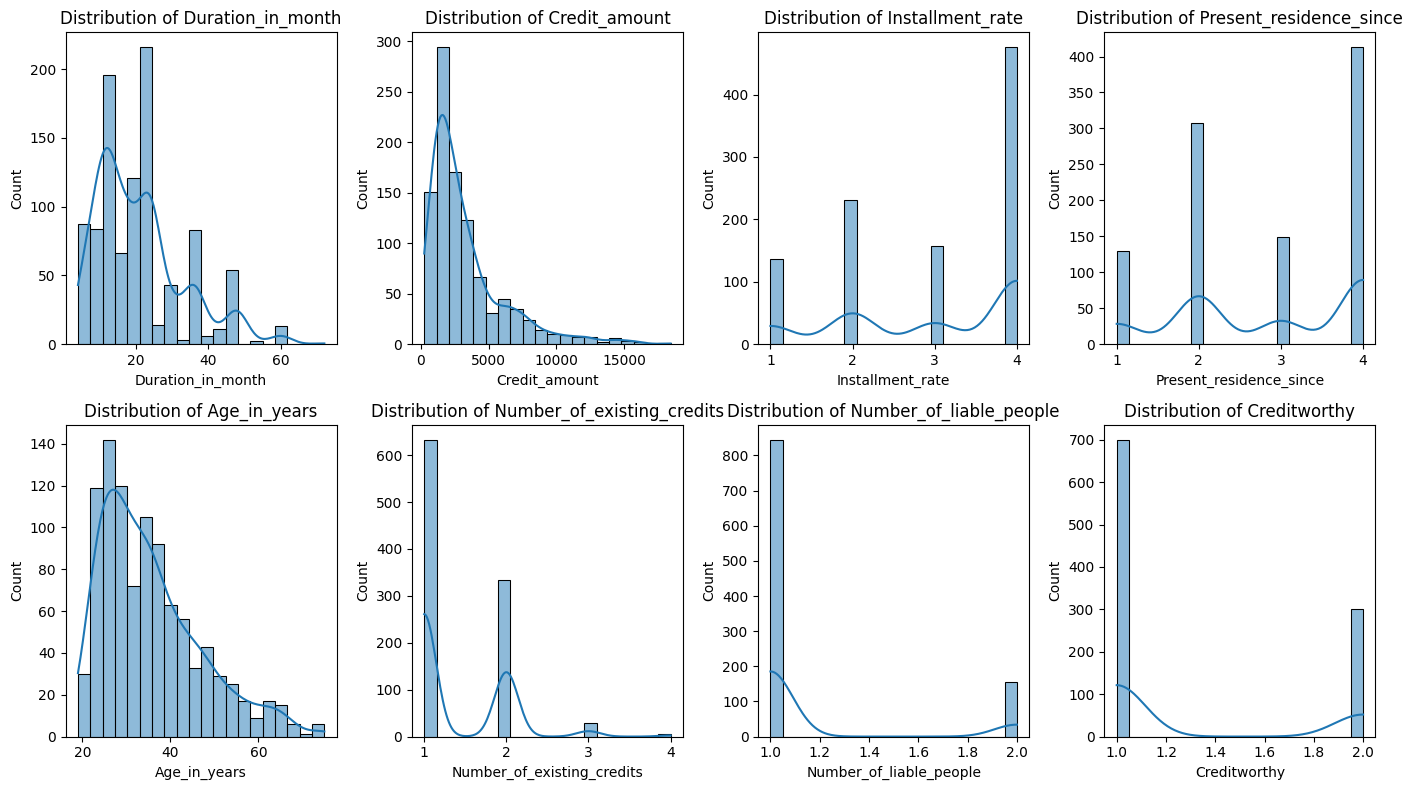

In [15]:
# Histograms for numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

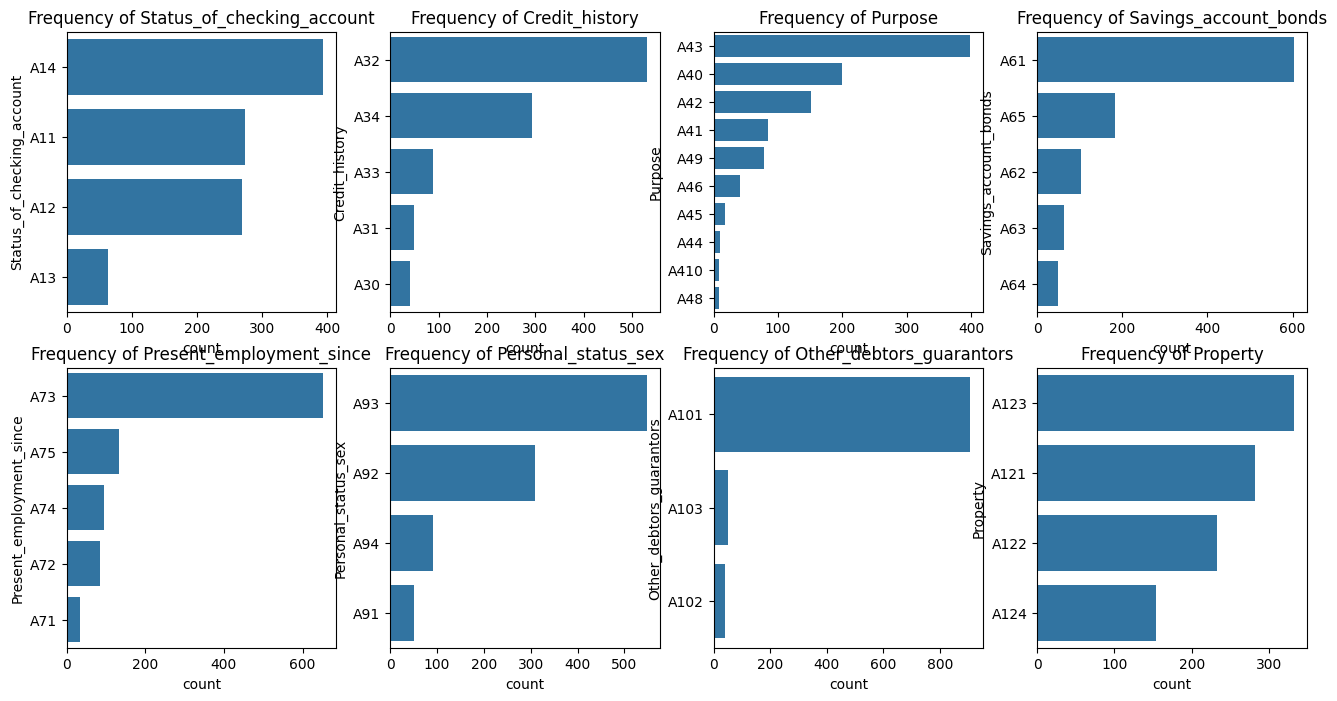

In [44]:
# Bar plots for categorical features
categorical_features = data.select_dtypes(include=['object', 'category']).columns

# Manually adjust grid size (2 rows and 4 columns for 7 plots)
plt.figure(figsize=(16, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 4, i + 1)  # Adjust to 2 rows and 4 columns
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Frequency of {col}')

plt.tight_layout()
plt.show()

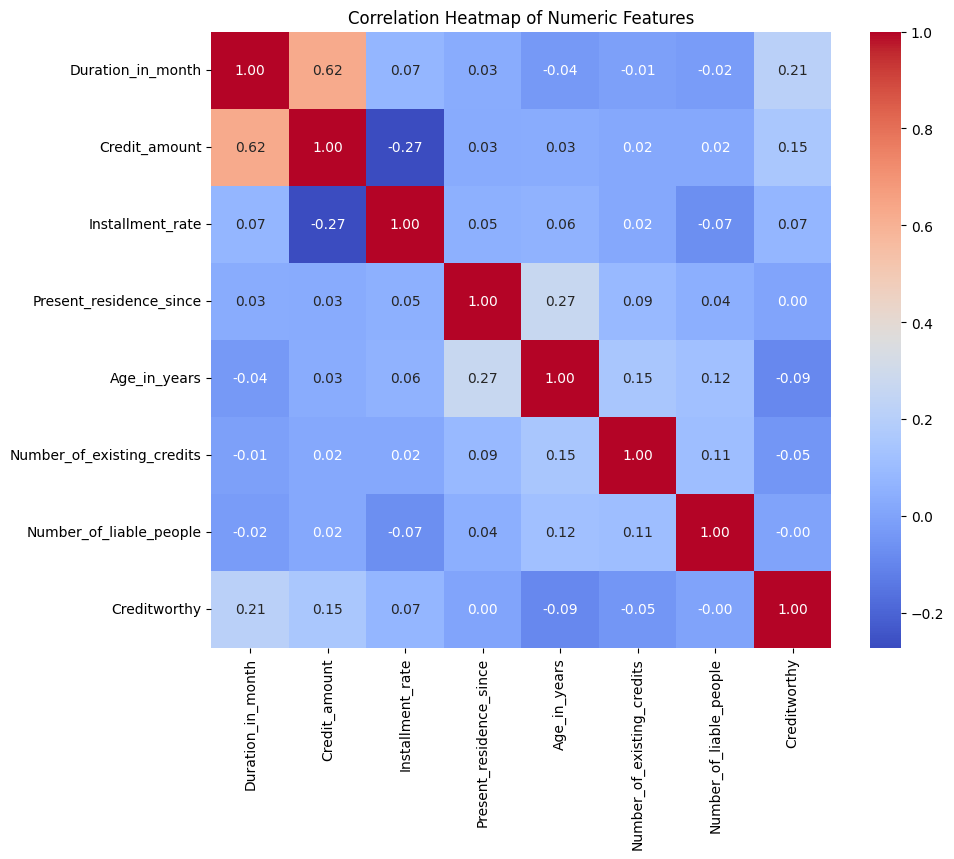

In [46]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

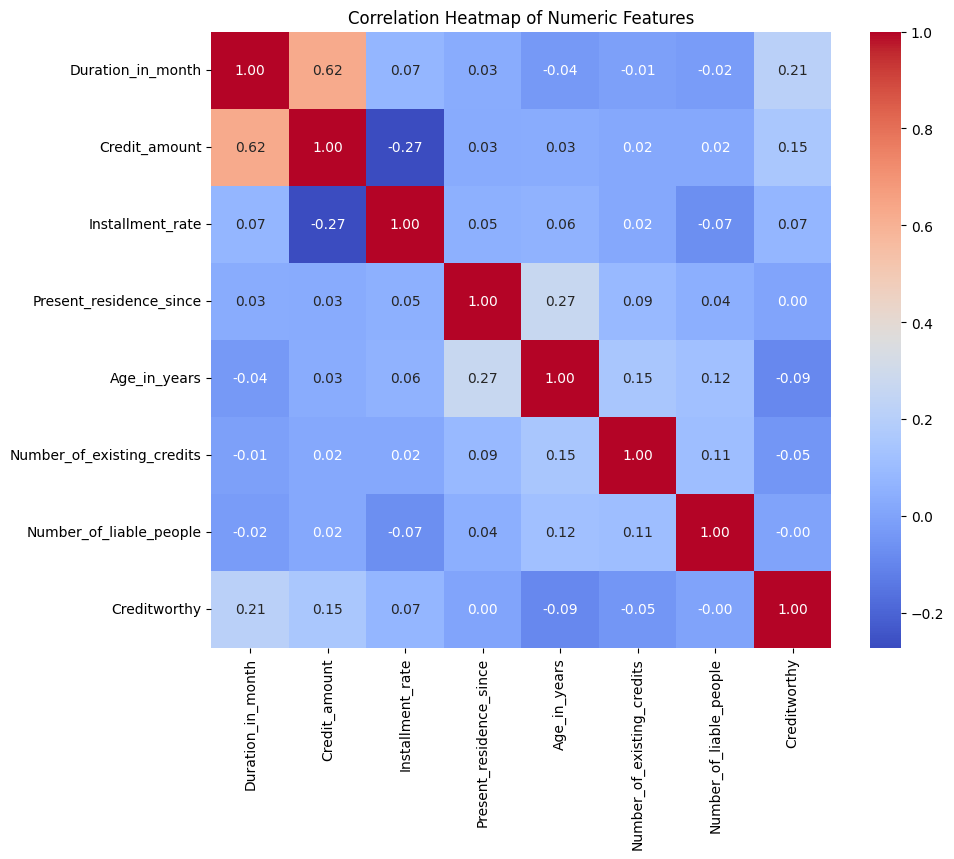

In [115]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig('Heatmap.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [48]:


# Split data into training and testing sets
X = data.drop('Creditworthy', axis=1)
y = data['Creditworthy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Preprocessing pipeline for numerical and categorical features
numeric_features = ['Duration_in_month', 'Credit_amount', 'Installment_rate', 'Present_residence_since', 'Age_in_years', 'Number_of_existing_credits', 'Number_of_liable_people']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = [col for col in X.columns if col not in numeric_features]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

3. Machine Learning Methods
Approach Development
Baseline Model:

Logistic Regression: A simple linear model that serves as a baseline. It is interpretable and provides a quick understanding of feature importance.

In [54]:
# Logistic Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression())])

lr_pipeline.fit(X_train, y_train)
lr_predictions = lr_pipeline.predict(X_test)
print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_predictions))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.76      0.86      0.81       135
           2       0.60      0.45      0.51        65

    accuracy                           0.72       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.71      0.72      0.71       200



Advanced Model:

Random Forest Classifier: A robust ensemble method that combines multiple decision trees to improve predictive accuracy and control overfitting.
Gradient Boosting Classifier: An advanced technique that builds trees sequentially to correct errors made by prior models, leading to potentially higher accuracy.

In [57]:
# Random Forest Classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report
              precision    recall  f1-score   support

           1       0.73      0.90      0.81       135
           2       0.62      0.32      0.42        65

    accuracy                           0.71       200
   macro avg       0.68      0.61      0.62       200
weighted avg       0.70      0.71      0.69       200



In [59]:
# Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])

gb_pipeline.fit(X_train, y_train)
gb_predictions = gb_pipeline.predict(X_test)
print("Gradient Boosting Classification Report")
print(classification_report(y_test, gb_predictions))


Gradient Boosting Classification Report
              precision    recall  f1-score   support

           1       0.75      0.82      0.78       135
           2       0.54      0.43      0.48        65

    accuracy                           0.69       200
   macro avg       0.64      0.63      0.63       200
weighted avg       0.68      0.69      0.69       200



Given that the bank considers it five times more costly to misclassify a non-creditworthy customer as creditworthy, the recall for Class 2 (Bad Credit) is the most crucial metric:

Logistic Regression has the highest recall for Class 2 (0.48). While this means that the model is better than the others at identifying non-creditworthy customers, it still misses 52% of them.
Random Forest and Gradient Boosting have lower recalls (0.32 and 0.38, respectively), which would result in more costly misclassifications for the bank.
Conclusion:
Based on the business priority to minimize costly misclassifications of non-creditworthy customers as creditworthy, Logistic Regression would be the best model among the three. Although none of the models is perfect in this context, Logistic Regression strikes a slightly better balance by having the highest recall for non-creditworthy customers. However, it still misses a significant portion, indicating a need for further tuning or potentially exploring other models to achieve better performance in this high-cost context.

SVM

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
# Separate features and target
X = data.drop('Creditworthy', axis=1)  # Replace 'target' with your target column name
y = data['Creditworthy']  # Replace 'target' with your target column name

# Convert categorical features to dummy variables (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Print the classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation to evaluate model performance
cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=10)

print(f"SVM Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.84      0.81       135
           2       0.62      0.52      0.57        65

    accuracy                           0.74       200
   macro avg       0.70      0.68      0.69       200
weighted avg       0.73      0.74      0.73       200

Confusion Matrix:
[[114  21]
 [ 31  34]]
SVM Cross-Validation Accuracy: 0.7438 ± 0.0478


The SVM model has a good overall performance with an accuracy of 74%, which is consistent with the cross-validation accuracy.
The model is better at predicting creditworthy customers (class 1) than unworthy ones (class 2), which is evident from the higher precision, recall, and F1-score for class 1.
Since misclassifying unworthy customers as creditworthy is more costly, the model's current performance (with 21 false positives) suggests there is room for improvement, especially in reducing these costly errors.
To enhance the model's effectiveness, particularly in identifying unworthy customers, further tuning or a different modeling approach might be necessary. Techniques like adjusting the class weights or using a different classifier that handles class imbalance better could be explored.

4. Evaluation Metrics and Protocol
Metrics:

Accuracy: Proportion of correctly classified instances among all instances.
Precision, Recall, and F1-Score: Provide deeper insights into model performance, especially in cases of class imbalance.
Evaluation Protocol:

Cross-Validation: To ensure robust performance evaluation, use k-fold cross-validation (e.g., k=5 or k=10). This helps in understanding the model's performance across different data splits and avoids overfitting to the training set.

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Sample data
# X, y = pd.read_csv('data.csv'), pd.read_csv('target.csv')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ]
)

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Gradient Boosting Pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1_weighted')
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='f1_weighted')
gb_grid_search.fit(X_train, y_train)
gb_best_model = gb_grid_search.best_estimator_

# Cross-validation
rf_scores = cross_val_score(rf_best_model, X, y, cv=5, scoring='f1_weighted')
gb_scores = cross_val_score(gb_best_model, X, y, cv=5, scoring='f1_weighted')

print(f"Random Forest Cross-Validation Accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")
print(f"Gradient Boosting Cross-Validation Accuracy: {gb_scores.mean():.4f} ± {gb_scores.std():.4f}")

# Fit models on the entire training set and evaluate on the test set
rf_best_model.fit(X_train, y_train)
gb_best_model.fit(X_train, y_train)

rf_predictions = rf_best_model.predict(X_test)
gb_predictions = gb_best_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Evaluate Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))

# ROC-AUC score
rf_proba = rf_best_model.predict_proba(X_test)[:, 1]
gb_proba = gb_best_model.predict_proba(X_test)[:, 1]

rf_roc_auc = roc_auc_score(y_test, rf_proba)
gb_roc_auc = roc_auc_score(y_test, gb_proba)

print(f"Random Forest ROC-AUC: {rf_roc_auc:.4f}")
print(f"Gradient Boosting ROC-AUC: {gb_roc_auc:.4f}")


Random Forest Cross-Validation Accuracy: 0.6715 ± 0.0214
Gradient Boosting Cross-Validation Accuracy: 0.6568 ± 0.0057
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.91      0.78       135
           2       0.40      0.12      0.19        65

    accuracy                           0.66       200
   macro avg       0.54      0.52      0.48       200
weighted avg       0.59      0.66      0.59       200

Random Forest Confusion Matrix:
[[123  12]
 [ 57   8]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.85      0.75       135
           2       0.31      0.14      0.19        65

    accuracy                           0.62       200
   macro avg       0.49      0.50      0.47       200
weighted avg       0.55      0.62      0.57       200

Gradient Boosting Confusion Matrix:
[[115  20]
 [ 56   9]]
Random Forest ROC-AUC: 0.5781
Gradie

Accuracy: Random Forest is marginally better than Gradient Boosting in overall accuracy.
Precision and Recall: Both models struggle with identifying Class 2 (negative class). Random Forest has a better precision and recall for Class 1, but Gradient Boosting is slightly better for Class 1 recall.
Consistency: Gradient Boosting shows slightly more consistent performance across different data splits than Random Forest.
ROC-AUC: Random Forest outperforms Gradient Boosting, though both are not very strong in class separation.

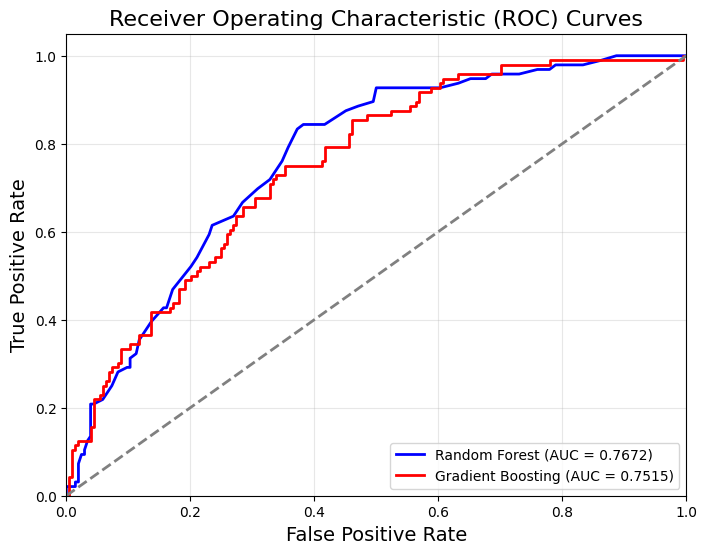

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assuming X and y are your features and target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Map y_test and y_train from {1, 2} to {0, 1}
y_train_mapped = y_train.map({1: 0, 2: 1})
y_test_mapped = y_test.map({1: 0, 2: 1})

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_mapped)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train_mapped)

# Predict probabilities for the ROC curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test_mapped, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Compute ROC curve and ROC area for Gradient Boosting
gb_fpr, gb_tpr, _ = roc_curve(y_test_mapped, gb_probs)
gb_roc_auc = auc(gb_fpr, gb_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_roc_auc:.4f})')
plt.plot(gb_fpr, gb_tpr, color='red', lw=2, label=f'Gradient Boosting (AUC = {gb_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


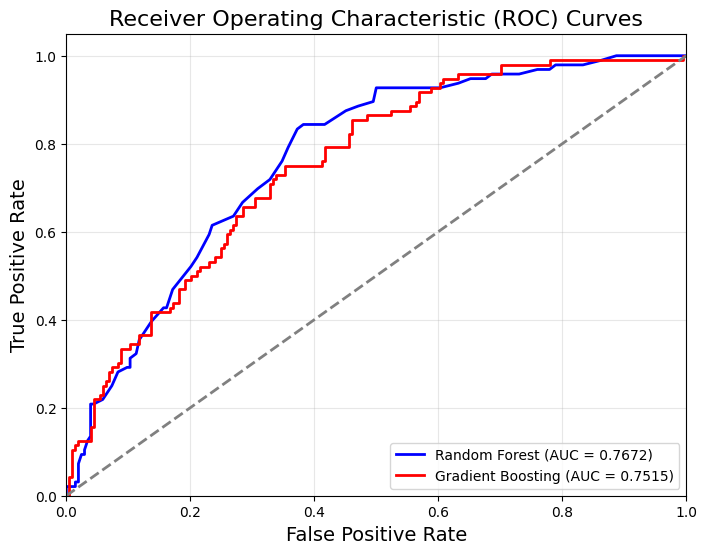

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assuming X and y are your features and target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict probabilities for the ROC curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label=2)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Compute ROC curve and ROC area for Gradient Boosting
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs, pos_label=2)
gb_roc_auc = auc(gb_fpr, gb_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_roc_auc:.4f})')
plt.plot(gb_fpr, gb_tpr, color='red', lw=2, label=f'Gradient Boosting (AUC = {gb_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
